<a href="https://colab.research.google.com/github/shivam-kotwalia/data-science-project/blob/master/Tensorflow%20Serving%20on%20Google%20Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
tf.__version__

'2.2.0-rc2'

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0
y_train = to_categorical(y_train, num_classes=10, )
y_test  = to_categorical(y_test,  num_classes=10)

In [0]:
from tensorflow.keras.models      import Sequential
from tensorflow.keras.layers      import Flatten, Dense, Conv2D, Conv1D
from tensorflow.keras.losses      import categorical_crossentropy
from tensorflow.keras.optimizers  import SGD
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.utils       import to_categorical
from tensorflow.keras.models      import save_model
import numpy as np 
import os 

In [0]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [0]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), input_shape=(28, 28, 1), activation=relu))
model.add(Flatten())
model.add(Dense(10, activation=softmax))

In [31]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                54090     
Total params: 54,170
Trainable params: 54,170
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile("rmsprop", categorical_crossentropy, metrics=["acc"])

In [33]:
x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [34]:
model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 15s 10ms/step - loss: 1.2398 - acc: 0.6435 - val_loss: 0.7204 - val_acc: 0.7405
Epoch 2/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.6613 - acc: 0.7620 - val_loss: 0.5997 - val_acc: 0.7800
Epoch 3/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5854 - acc: 0.7891 - val_loss: 0.5577 - val_acc: 0.7986
Epoch 4/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5482 - acc: 0.8046 - val_loss: 0.5323 - val_acc: 0.8086
Epoch 5/20
1500/1500 [==============================] - 14s 10ms/step - loss: 0.5254 - acc: 0.8143 - val_loss: 0.5203 - val_acc: 0.8147
Epoch 6/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5087 - acc: 0.8202 - val_loss: 0.5083 - val_acc: 0.8152
Epoch 7/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4950 - acc: 0.8266 - val_loss: 0.4946 - val_acc: 0.8217
Epoch 8/20
1500/1500 [==========================

In [92]:
VERSION = 1
!mkdir -p save_model/{VERSION}
save_model(model, os.path.join("save_model", str(VERSION)))

INFO:tensorflow:Assets written to: save_model/1/assets


In [37]:
#Currently you saved the model so you know the input and output but if you would have got the model from someone this would have been difficult
# So we have a CLI from TensorFlow to cheek MetaGraphDefs & Sugnature Defs
!saved_model_cli show --dir "save_model" --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['conv2d_3_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serving_default_conv2d_3_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_2'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
W0404 21:29:55.792284 139999391315840 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core

In [41]:
# Download the TensorFlow Serving 
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl -s https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt -qq update 

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
OK
58 packages can be upgraded. Run 'apt list --upgradable' to see them.


In [42]:
!apt-get -qq install  tensorflow-model-server

Selecting previously unselected package tensorflow-model-server.
(Reading database ... 133872 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.1.0_all.deb ...
Unpacking tensorflow-model-server (2.1.0) ...
Setting up tensorflow-model-server (2.1.0) ...


In [44]:
! tensorflow_model_server  --help

usage: tensorflow_model_server
Flags:
	--port=8500                      	int32	Port to listen on for gRPC API
	--grpc_socket_path=""            	string	If non-empty, listen to a UNIX socket for gRPC API on the given path. Can be either relative or absolute path.
	--rest_api_port=0                	int32	Port to listen on for HTTP/REST API. If set to zero HTTP/REST API will not be exported. This port must be different than the one specified in --port.
	--rest_api_num_threads=8         	int32	Number of threads for HTTP/REST API processing. If not set, will be auto set based on number of CPUs.
	--rest_api_timeout_in_ms=30000   	int32	Timeout for HTTP/REST API calls.
	--enable_batching=false          	bool	enable batching
	--allow_version_labels_for_unavailable_models=false	bool	If true, allows assigning unused version labels to models that are not available yet.
	--batching_parameters_file=""    	string	If non-empty, read an ascii BatchingParameters protobuf from the supplied file name and

In [138]:
%%bash --bg
nohup tensorflow_model_server --rest_api_port=8501 --model_name=fashion_mnist --model_base_path="/content/save_model" > server.log 2>&1

Starting job # 13 in a separate thread.


In [139]:
! cat server.log

[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 238] NET_LOG: Entering the event loop ...


In [0]:
# Prediction_function
import requests
import matplotlib.pyplot as plt
import json

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def _prediction(data):
    headers = {"content-type": "application/json"}
    json_response = requests.post('http://localhost:8501/v1/models/fashion_mnist:predict', data=data, headers=headers)
    json_result = json.loads(json_response.text)
    return json_result["predictions"]

def _prepare_image(num):
    image = x_test[num]
    plt.imshow(image.reshape(28, 28),cmap="gray")
    plt.plot()
    image = np.expand_dims(image, 0)
    return json.dumps({"signature_name": "serving_default", "instances": image.tolist()})

'Sandal'

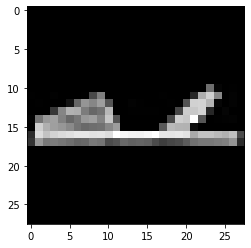

In [144]:
image_json = _prepare_image(111)
image_pred = _prediction(image_json)
class_names[np.argmax(image_pred[0])]

In [141]:
! tail server.log

[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 238] NET_LOG: Entering the event loop ...
